In [2]:
# Importo librerías

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración ara poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# EDA y Transformación de datos

## 1. Exploratory Data Analysis (EDA)

In [3]:
def dataframe_exploration(df,df_name):

    print("*" * 50,"\n")
    print(f"--- DATAFRAME EXPLORATION: {df_name} ---\n")
    print("*" * 50,"\n")
    
    # Estructura del dataframe y tipos de datos
    print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
    
    print(f"Muestra de filas aleatorias:")
    display(df.sample(5))
    
    print(f"\nTipos de datos por columna:")
    display(pd.DataFrame(df.dtypes, columns = ["tipo_dato"]))
    
    print(f"\nInformacion del DataFrame:")
    display(df.info())
    print("_" * 50,"\n")

    # Valores duplicados
    duplicated_values = df.duplicated().sum()
    duplicated_percentage = round(duplicated_values / df.shape[0] * 100, 2)
    print(f"Numero de duplicados en el conjunto de datos son: {duplicated_values}, un {duplicated_percentage}%.\n")
    print("_" * 50,"\n")

    # Valores nulos
    print("Valores nulos por columna:")
    null_values = df.isnull().sum()
    null_percentage = null_values / df.shape[0] * 100
    df_nulos = pd.DataFrame(null_percentage, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print("_" * 50,"\n")
    
    # Estadisticas basicas para columnas numericas
    col_num = df.select_dtypes(include=["number"])
    if not col_num.empty:
        print("Estadisticas basicas de columnas numericas:")
        df_num_est = pd.DataFrame(col_num.describe().T)
        display(df_num_est)
        
        # Visualizacion de valores atipicos
        print("\nEstadisticas basicas de columnas numericas:")   
        fig, axes = plt.subplots(nrows=1, ncols=len(col_num.columns), figsize=(16, 5))
        for ax, col in zip(axes.flat, col_num.columns):
            sns.boxplot(x=col, data=df, ax=ax)
        plt.tight_layout()
        plt.show()
            
    else:
        print("\nNo hay columnas numericas en el DataFrame.")

    # Mostrar estadisticas basicas para columnas categoricas
    col_cat = df.select_dtypes(include=["object", "category"])
    if not col_cat.empty:
        print("\nEstadisticas basicas de columnas categoricas:")
        df_cat_est = pd.DataFrame(col_cat.describe().T)
        display(df_cat_est)
    else:
        print("\nNo hay columnas categoricas en el DataFrame.\n")
        
    print("\n\n")

************************************************** 

--- DATAFRAME EXPLORATION: Finanzas Hotel Bookings ---

************************************************** 

El DataFrame tiene 182877 filas y 32 columnas.

Muestra de filas aleatorias:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
131576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
173033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
36401,Resort Hotel,False,263.0,2017.0,May,19.0,12.0,2.0,6.0,2.0,0.0,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,NaN,A,1.0,240.0,NaN,0.0,Transient-Party,56.0,0.0,2.0,Check-Out,2017-05-20 00:00:00,NaN
47270,City Hotel,True,2.0,NaN,2,8.0,14.0,2.0,1.0,1.0,NaN,0.0,SC,AGO,NaN,Direct,0.0,0.0,0.0,A,A,0.0,14.0,NaN,0.0,Transient-Party,79.0,0.0,0.0,No-Show,2016-02-14 00:00:00,NaN



Tipos de datos por columna:


,tipo_dato
hotel,object
is_canceled,object
lead_time,float64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,float64
arrival_date_day_of_month,float64
stays_in_weekend_nights,float64
stays_in_week_nights,float64
adults,float64



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 182877 entries, 0 to 182876
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119490 non-null  float64
 3   arrival_date_year               64829 non-null   float64
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        101004 non-null  float64
 6   arrival_date_day_of_month       119271 non-null  float64
 7   stays_in_weekend_nights         119490 non-null  float64
 8   stays_in_week_nights            119490 non-null  float64
 9   adults                          119428 non-null  float64
 10  children                        69302 non-null   float64
 11  babies                          119431 non-null  float6

None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 63040, un 34.47%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos
hotel,34.715683
is_canceled,34.715683
lead_time,34.661002
arrival_date_year,64.550490
arrival_date_month,34.715683
arrival_date_week_number,44.769435
arrival_date_day_of_month,34.780754
stays_in_weekend_nights,34.661002
stays_in_week_nights,34.661002
adults,34.694904


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
lead_time,119490.0,104.172628,106.975949,0.00,18.00,69.000,161.0,737.000000
arrival_date_year,64829.0,2016.156196,0.706674,2015.00,2016.00,2016.000,2017.0,2017.000000
arrival_date_week_number,101004.0,27.175785,13.613871,1.00,16.00,28.000,38.0,53.000000
arrival_date_day_of_month,119271.0,15.795977,8.780503,1.00,8.00,16.000,23.0,31.000000
stays_in_weekend_nights,119490.0,0.939461,1.082472,0.00,0.00,1.000,2.0,19.914715
stays_in_week_nights,119490.0,2.515068,1.976511,0.00,1.00,2.000,3.0,50.000000
adults,119428.0,6.244423,14.574814,0.00,2.00,2.000,2.0,59.000000
children,69302.0,0.125162,0.688305,0.00,0.00,0.000,0.0,19.000000
babies,119431.0,0.019903,0.433366,0.00,0.00,0.000,0.0,19.000000
is_repeated_guest,114376.0,0.031877,0.175674,0.00,0.00,0.000,0.0,1.000000



Estadisticas basicas de columnas numericas:


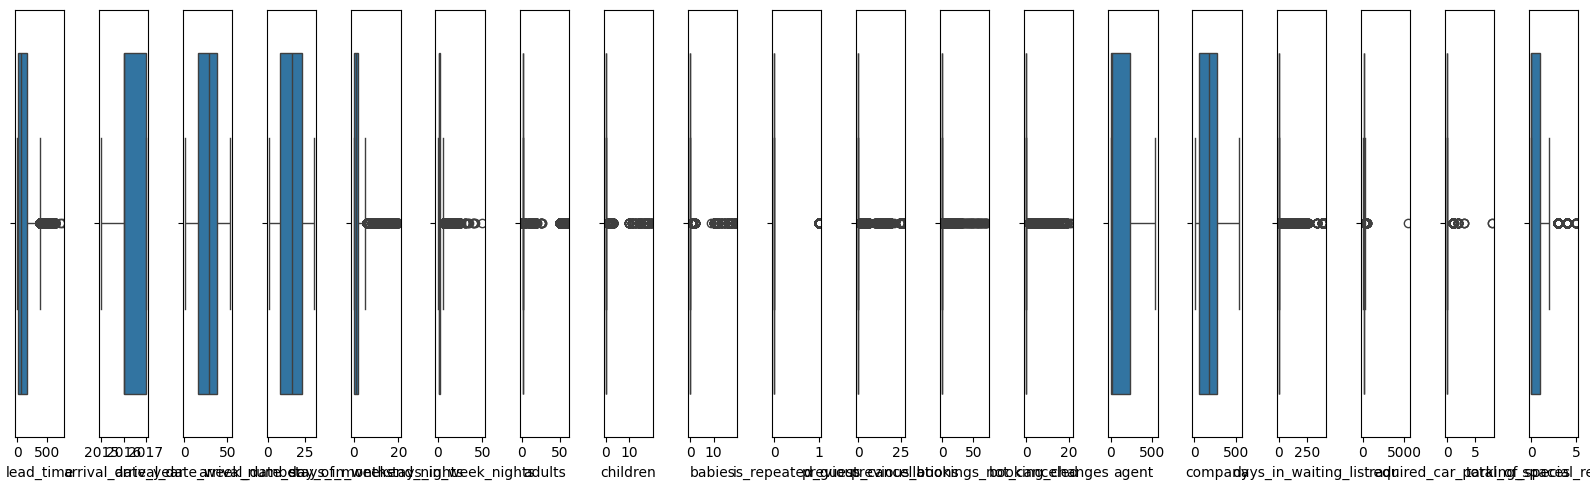


Estadisticas basicas de columnas categoricas:


,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,False,75166
arrival_date_month,119390,15,August,13877
meal,119390,5,BB,92310
country,65054,163,PRT,26577
market_segment,59934,8,Online TA,28331
distribution_channel,105899,5,TA/TO,86822
reserved_room_type,79275,10,A,57202
assigned_room_type,119390,12,A,74053
customer_type,94199,4,Transient,70610


In [4]:
# Guardo cada csv en un Dataframe
def csv_to_dataframe(file):
    return pd.read_csv(file, index_col=0)

df = csv_to_dataframe("finanzas-hotel-bookings.csv")

dataframe_exploration(df, "Finanzas Hotel Bookings")

## 2. Limpieza y Transformación de Datos:


### 2.1 Limpieza y transformación:

In [5]:
def clean_data(df):
    # Elimino duplicados si los hay
    if df.duplicated().any():
        print(f"Hay {df.duplicated().sum()} registros duplicados encontrados y eliminados.")
        df = df.drop_duplicates(keep='first')
    else:
        print("No se encontraron duplicados.")
    
    # Elimino columnas con más del 80% de registros nulos
    cols_null_percentage = df.isnull().mean(axis=0)
    cols_to_remove = cols_null_percentage[cols_null_percentage > 0.8].index

    if not cols_to_remove.empty:
        df = df.drop(columns=cols_to_remove)
        print(f"Columnas eliminadas con más del 80% de valores nulos: {list(cols_to_remove)}")
    else:
        print("No se eliminaron columnas por valores nulos.")
        
    # Elimino filas con más del 80% de sus campos nulos
    row_null_percentage = df.isnull().mean(axis=1)
    rows_to_remove = row_null_percentage[row_null_percentage > 0.8].index

    if not rows_to_remove.empty:
        df = df.drop(index=rows_to_remove)
        removed_rows = len(rows_to_remove)
        print(f"Número total de registros eliminados con más del 80% de sus campos nulos: {removed_rows}")
    else:
        print("No se eliminaron registros por valores nulos.")

    # Elimino columnas con un solo valor unico
    cols_one_value = [col for col in df.columns if df[col].nunique() == 1]
    if cols_one_value:
        df = df.drop(columns=cols_one_value)
        print(f"Columnas eliminadas con solo un valor unico: {cols_one_value}")
    else:
        print("No se encontraron columnas con solo un valor unico.")
        
    # Redondeo columnas tipo float a dos decimales si no se pueden convertir a enteros
    cols_float = df.select_dtypes(include=[float]).columns
    if cols_float.any():
        print(f"Columnas tipo float redondeadas a dos decimales o convertidas a enteros: {list(cols_float)}")
        for col in cols_float:
            df[col] = df[col].apply(lambda x: round(x, 2) if x % 1 != 0 else int(x))
    else:
        print("No se encontraron columnas tipo float.")
       
    return df

In [6]:
df_cleaned= clean_data(df)
df_cleaned

Hay 63040 registros duplicados encontrados y eliminados.
Columnas eliminadas con más del 80% de valores nulos: ['company', '0']
Número total de registros eliminados con más del 80% de sus campos nulos: 1832
No se encontraron columnas con solo un valor unico.
Columnas tipo float redondeadas a dos decimales o convertidas a enteros: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015.0,July,27.0,1.0,0,0,2,NaN,0,BB,PRT,NaN,Direct,0.0,NaN,0,C,C,3,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737,NaN,July,27.0,1.0,0,0,2,NaN,0,BB,NaN,NaN,Direct,0.0,0.0,0,NaN,C,4,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7,2015.0,July,27.0,1.0,0,1,1,0.0,0,BB,GBR,NaN,Direct,0.0,0.0,0,A,C,0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13,NaN,July,27.0,1.0,0,1,1,NaN,0,BB,GBR,Corporate,Corporate,0.0,0.0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14,NaN,July,NaN,1.0,0,2,2,NaN,0,BB,NaN,Online TA,TA/TO,0.0,0.0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017.0,August,35.0,30.0,2,5,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0.0,0.0,0,A,A,0,394.0,0,NaN,96.14,0,0,Check-Out,2017-06-09 00:00:00
119386,City Hotel,False,102,NaN,August,35.0,31.0,2,5,3,NaN,0,BB,FRA,NaN,TA/TO,0.0,NaN,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out,2017-07-09 00:00:00
119387,City Hotel,False,34,2017.0,August,35.0,31.0,2,5,2,NaN,0,BB,NaN,Online TA,TA/TO,0.0,0.0,0,NaN,D,0,9.0,0,Transient,157.71,0,4,Check-Out,2017-07-09 00:00:00
119388,City Hotel,False,109,NaN,August,35.0,31.0,2,5,55,0.0,0,BB,NaN,Online TA,TA/TO,0.0,0.0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out,2017-07-09 00:00:00


### 2.2 Gestión de nulos:

In [7]:
df_imputed = df_cleaned.copy()

#### 2.2.1 Imputación numérica:

In [8]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulls_col_num = df_imputed[df_imputed.columns[df_imputed.isnull().any()]].select_dtypes(include = np.number).columns
print(f"Las columnas numéricas que tienen nulos son:\n{nulls_col_num}\n")
print(f"El porcentaje de nulos que tiene cada columna numerica es:\n{df_imputed[nulls_col_num].isnull().sum() / df_imputed.shape[0]}")

Las columnas numéricas que tienen nulos son:
Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'children', 'is_repeated_guest',
       'previous_cancellations', 'agent'],
      dtype='object')

El porcentaje de nulos que tiene cada columna numerica es:
arrival_date_year            0.457455
arrival_date_week_number     0.155400
arrival_date_day_of_month    0.001008
children                     0.420525
is_repeated_guest            0.042473
previous_cancellations       0.363196
agent                        0.136859
dtype: float64


In [9]:
# Hay algunas columnas con porcentajes elevados de nulos o valores atípicos, pero por el tipo de dato que se está manejando en estas columnas se necesitan numeros enteros
# Hacemos un describe de la media y la mediana para confirmar cuales son numeros enteros
for col in nulls_col_num:
    display(df[col].describe()[["mean", "50%"]])

mean    2016.156196
50%     2016.000000
Name: arrival_date_year, dtype: float64

mean    27.175785
50%     28.000000
Name: arrival_date_week_number, dtype: float64

mean    15.795977
50%     16.000000
Name: arrival_date_day_of_month, dtype: float64

mean    0.125162
50%     0.000000
Name: children, dtype: float64

mean    0.031877
50%     0.000000
Name: is_repeated_guest, dtype: float64

mean    0.109317
50%     0.000000
Name: previous_cancellations, dtype: float64

mean    86.693382
50%     14.000000
Name: agent, dtype: float64

In [10]:
# Opto por la mediana, al no tener decimales es más coherente con el tipo de dato de las columnas
# Calcular la mediana para cada columna específica y rellenar los valores nulos
def impute_with_median (df,cols):
    for col in cols:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        df[col] = df[col].round(2)
    # Comprobar los nulos para cada columna específica
    for col in cols:
        print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")

In [11]:
impute_with_median(df_imputed, nulls_col_num)

Después del 'fillna' la columna ARRIVAL_DATE_YEAR tiene 0 nulos
Después del 'fillna' la columna ARRIVAL_DATE_WEEK_NUMBER tiene 0 nulos
Después del 'fillna' la columna ARRIVAL_DATE_DAY_OF_MONTH tiene 0 nulos
Después del 'fillna' la columna CHILDREN tiene 0 nulos
Después del 'fillna' la columna IS_REPEATED_GUEST tiene 0 nulos
Después del 'fillna' la columna PREVIOUS_CANCELLATIONS tiene 0 nulos
Después del 'fillna' la columna AGENT tiene 0 nulos


#### 2.2.2 Imputación categórica:

In [12]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulls_col_cat = df_imputed[df_imputed.columns[df_imputed.isnull().any()]].select_dtypes(include = "O").columns
print(f"Las columnas categóricas que tienen nulos son:\n{nulls_col_cat}\n")
print(f"El porcentaje de nulos que tiene cada columna categórica es:\n{df_imputed[nulls_col_cat].isnull().sum() / df_imputed.shape[0]}")

Las columnas categóricas que tienen nulos son:
Index(['country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'customer_type', 'reservation_status_date'],
      dtype='object')

El porcentaje de nulos que tiene cada columna categórica es:
country                    0.455523
market_segment             0.497987
distribution_channel       0.114114
reserved_room_type         0.337333
customer_type              0.212644
reservation_status_date    0.109046
dtype: float64


In [13]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulls_col_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])
    print("........................")

La distribución de las categorías para la columna COUNTRY


country
PRT    0.145327
GBR    0.036008
FRA    0.031475
ESP    0.025766
DEU    0.021720
         ...   
LIE    0.000005
NIC    0.000005
GGY    0.000005
FJI    0.000005
UMI    0.000005
Name: count, Length: 163, dtype: float64

........................
La distribución de las categorías para la columna MARKET_SEGMENT


market_segment
Online TA        0.154918
Offline TA/TO    0.066252
Groups           0.054725
Direct           0.034745
Corporate        0.014452
Complementary    0.001985
Aviation         0.000645
Undefined        0.000005
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DISTRIBUTION_CHANNEL


distribution_channel
TA/TO        0.474756
Direct       0.071070
Corporate    0.032257
GDS          0.000962
Undefined    0.000027
Name: count, dtype: float64

........................
La distribución de las categorías para la columna RESERVED_ROOM_TYPE


reserved_room_type
A    0.312789
D    0.069101
E    0.023759
F    0.010428
G    0.007519
B    0.004079
C    0.003418
H    0.002340
P    0.000033
L    0.000022
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CUSTOMER_TYPE


customer_type
Transient          0.386107
Transient-Party    0.108483
Contract           0.017990
Group              0.002515
Name: count, dtype: float64

........................
La distribución de las categorías para la columna RESERVATION_STATUS_DATE


reservation_status_date
2015-10-21 00:00:00    0.007098
2015-07-06 00:00:00    0.004003
2016-11-25 00:00:00    0.003784
2015-01-01 00:00:00    0.003707
2016-01-18 00:00:00    0.003073
                         ...   
2029-04-31             0.000005
2022-09-31             0.000005
2029-02-30             0.000005
2029-06-31             0.000005
2024-11-31             0.000005
Name: count, Length: 991, dtype: float64

........................


In [14]:
def cat_undefined (df,cols):
    for col in cols:
        # reemplazamos los nulos por el valor Undefined para cada una de las columnas de la lista
        df[col] = df[col].fillna("Undefined")  
    # Comprobamos si quedan nulos en las columnas categóricas. 
    print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
    display(df[cols].isnull().sum())
    return df

In [15]:
# En ninguna columna podemos decir que hay una categoría dominante, por lo que crearemos una categoría nueva 'Undefined', menos en "reservation_status_date"
cols_undefined = ['country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'customer_type']
cat_undefined(df_imputed,cols_undefined)

Después del reemplazo usando 'fillna' quedan los siguientes nulos


country                 0
market_segment          0
distribution_channel    0
reserved_room_type      0
customer_type           0
dtype: int64

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015.0,July,27.0,1.0,0,0,2,0.0,0,BB,PRT,Undefined,Direct,0.0,0.0,0,C,C,3,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737,2016.0,July,27.0,1.0,0,0,2,0.0,0,BB,Undefined,Undefined,Direct,0.0,0.0,0,Undefined,C,4,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7,2015.0,July,27.0,1.0,0,1,1,0.0,0,BB,GBR,Undefined,Direct,0.0,0.0,0,A,C,0,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13,2016.0,July,27.0,1.0,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0.0,0.0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14,2016.0,July,28.0,1.0,0,2,2,0.0,0,BB,Undefined,Online TA,TA/TO,0.0,0.0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017.0,August,35.0,30.0,2,5,2,0.0,0,BB,Undefined,Offline TA/TO,TA/TO,0.0,0.0,0,A,A,0,394.0,0,Undefined,96.14,0,0,Check-Out,2017-06-09 00:00:00
119386,City Hotel,False,102,2016.0,August,35.0,31.0,2,5,3,0.0,0,BB,FRA,Undefined,TA/TO,0.0,0.0,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out,2017-07-09 00:00:00
119387,City Hotel,False,34,2017.0,August,35.0,31.0,2,5,2,0.0,0,BB,Undefined,Online TA,TA/TO,0.0,0.0,0,Undefined,D,0,9.0,0,Transient,157.71,0,4,Check-Out,2017-07-09 00:00:00
119388,City Hotel,False,109,2016.0,August,35.0,31.0,2,5,55,0.0,0,BB,Undefined,Online TA,TA/TO,0.0,0.0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out,2017-07-09 00:00:00


### 2.3 Gestión de datos inconsistentes:

In [16]:
# La columna 'arrival_date_month' tiene los meses a veces en numero y a veces en texto
df_imputed['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       '1', 'January', 'February', '2', '3', 'March', 'April', 'May',
       'June'], dtype=object)

In [17]:
# Crear la función de conversión con el diccionario incluido
def convert_month_to_number(x):
    # Definir el diccionario de conversión dentro de la función
    month_dict = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 
        'May': 5, 'June': 6, 'July': 7, 'August': 8, 
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    if isinstance(x, int):  # Si ya es un número, devolverlo tal cual
        return x
    if x.isdigit():  # Si es una cadena que representa un número
        return int(x)
    return month_dict.get(x, None)  # Convertir el nombre del mes a número usando el diccionario

In [18]:
# Aplicar la función a la columna usando apply
df_imputed['arrival_date_month'] = df_imputed['arrival_date_month'].apply(convert_month_to_number)

In [19]:
# Función para convertir la columna al tipo datetime y manejar errores
def convert_to_datetime(df, col):
    # Intentar convertir la columna al tipo datetime
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Identificar y mostrar los registros que se convirtieron en nulos
    problematic_rows = df[df[col].isnull()]
    print(f"Se encontraron {len(problematic_rows)} registros problemáticos que se convirtieron en nulos en la columna {col}:")
    print(problematic_rows)
    
    # Mostrar el tipo de la columna después de la conversión
    print(f"La columna {col} se ha convertido a tipo: {df[col].dtype}")
    return df

# Los nulos se corresponden a fechas que no existen, como 2030-02-30, 2030-11-31, 2022-09-31...

In [20]:
convert_to_datetime(df_imputed,'reservation_status_date')

Se encontraron 12898 registros problemáticos que se convirtieron en nulos en la columna reservation_status_date:
               hotel is_canceled  lead_time  arrival_date_year  \
20      Resort Hotel       False         37             2016.0   
46      Resort Hotel       False         96             2016.0   
51      Resort Hotel       False         93             2015.0   
67      Resort Hotel       False         51             2016.0   
70      Resort Hotel        True         62             2015.0   
...              ...         ...        ...                ...   
119338    City Hotel       False        137             2017.0   
119346    City Hotel       False         45             2017.0   
119350    City Hotel       False        286             2016.0   
119377    City Hotel       False        185             2017.0   
119383    City Hotel       False        164             2017.0   

        arrival_date_month  arrival_date_week_number  \
20                       7            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015.0,7,27.0,1.0,0,0,2,0.0,0,BB,PRT,Undefined,Direct,0.0,0.0,0,C,C,3,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2016.0,7,27.0,1.0,0,0,2,0.0,0,BB,Undefined,Undefined,Direct,0.0,0.0,0,Undefined,C,4,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015.0,7,27.0,1.0,0,1,1,0.0,0,BB,GBR,Undefined,Direct,0.0,0.0,0,A,C,0,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2016.0,7,27.0,1.0,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0.0,0.0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2016.0,7,28.0,1.0,0,2,2,0.0,0,BB,Undefined,Online TA,TA/TO,0.0,0.0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017.0,8,35.0,30.0,2,5,2,0.0,0,BB,Undefined,Offline TA/TO,TA/TO,0.0,0.0,0,A,A,0,394.0,0,Undefined,96.14,0,0,Check-Out,2017-06-09
119386,City Hotel,False,102,2016.0,8,35.0,31.0,2,5,3,0.0,0,BB,FRA,Undefined,TA/TO,0.0,0.0,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out,2017-07-09
119387,City Hotel,False,34,2017.0,8,35.0,31.0,2,5,2,0.0,0,BB,Undefined,Online TA,TA/TO,0.0,0.0,0,Undefined,D,0,9.0,0,Transient,157.71,0,4,Check-Out,2017-07-09
119388,City Hotel,False,109,2016.0,8,35.0,31.0,2,5,55,0.0,0,BB,Undefined,Online TA,TA/TO,0.0,0.0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out,2017-07-09


In [21]:
def create_datetime_column(df, year_col, month_col, new_col):
    # Asignar una columna 'day' con el valor 1
    df = df.assign(day=1)
    
    # Crear una nueva columna de tipo datetime con las columnas de año y mes
    df[new_col] = pd.to_datetime(df[[year_col, month_col, 'day']].rename(columns={
        year_col: 'year', month_col: 'month'
    }))
    
    # Eliminar la columna 'day'
    df = df.drop(columns=['day'])
    
    # Verificar el tipo de la nueva columna
    print(f"Se ha creado una nueva columna '{new_col}' con el año '{year_col}' y el mes '{month_col}' de tipo: {df[new_col].dtype}")
    return df

In [22]:
# Aplicar la función al DataFrame
df_imputed = create_datetime_column(df_imputed, 'arrival_date_year', 'arrival_date_month', 'arrival_date_year_month')

# Mostrar el resultado
print(df_imputed[['arrival_date_year', 'arrival_date_month', 'arrival_date_year_month']].head())

Se ha creado una nueva columna 'arrival_date_year_month' con el año 'arrival_date_year' y el mes 'arrival_date_month' de tipo: datetime64[ns]
   arrival_date_year  arrival_date_month arrival_date_year_month
0             2015.0                   7              2015-07-01
1             2016.0                   7              2016-07-01
2             2015.0                   7              2015-07-01
3             2016.0                   7              2016-07-01
4             2016.0                   7              2016-07-01


## 3. Guardar CSV

In [23]:
# Guardamos el DataFrame
df_imputed.to_csv("reservas_limpio_final.csv",index=False)

In [27]:
def categorize_adr_column(data):
    # Calcular la media y la desviación estándar de ADR, ignorando los valores nulos
    adr_mean = data['adr'].mean()
    adr_std = data['adr'].std()

    # Definir umbrales para las categorías
    low_threshold = adr_mean - adr_std
    high_threshold = adr_mean + adr_std

    # Función para categorizar ADR
    def categorize_adr(adr):
        if pd.isna(adr):
            return 'Desconocido'
        elif adr < low_threshold:
            return 'Bajo'
        elif adr > high_threshold:
            return 'Alto'
        else:
            return 'Medio'

    # Crear una nueva columna con los niveles
    data['ADR_Nivel'] = data['adr'].apply(categorize_adr)
    
    return data